In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings


In [41]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
X=df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [43]:
Y=df['math_score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [44]:
#perform transformation
 
num_features = X.select_dtypes(exclude=object).columns
cat_features = X.select_dtypes(include=object).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([("OneHotEncoder",oh_transformer,cat_features),
                                ("StandardScaler",numeric_transformer,num_features)])





In [45]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [46]:
X = preprocessor.fit_transform(X)


In [47]:
X.shape

(1000, 19)

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [52]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [53]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse,r2_square

In [56]:
from sklearn.neighbors import KNeighborsRegressor

models= {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train,Y_train)
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(Y_train,Y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(Y_test,Y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("model performance for training set")
    print("- root mean squared error: {:.4f}".format(model_train_rmse))
    print("- mean abs error: {:.4f}".format(model_train_mae))
    print("- r2 score: {:.4f}".format(model_train_r2))
    
    print("......................................")
    print("model performance for test set")
    print("- root mean squared error: {:.4f}".format(model_test_rmse))
    print("- mean abs error: {:.4f}".format(model_test_mae))
    print("- r2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
      
    

LinearRegression
model performance for training set
- root mean squared error: 5.3257
- mean abs error: 4.2695
- r2 score: 0.8742
......................................
model performance for test set
- root mean squared error: 5.4212
- mean abs error: 4.2347
- r2 score: 0.8792


Lasso
model performance for training set
- root mean squared error: 6.5938
- mean abs error: 5.2063
- r2 score: 0.8071
......................................
model performance for test set
- root mean squared error: 6.5197
- mean abs error: 5.1579
- r2 score: 0.8253


Ridge
model performance for training set
- root mean squared error: 5.3233
- mean abs error: 4.2650
- r2 score: 0.8743
......................................
model performance for test set
- root mean squared error: 5.3904
- mean abs error: 4.2111
- r2 score: 0.8806


K-Neighbors Regressor
model performance for training set
- root mean squared error: 5.7079
- mean abs error: 4.5168
- r2 score: 0.8555
......................................
model pe

In [63]:
#Results

pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,Model Name,r2_score
2,Ridge,0.880593
0,LinearRegression,0.879226
5,RandomForestRegressor,0.852034
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.847089
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.757272


In [67]:
#Linear regression

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,Y_train)
y_pred = lin_model.predict(X_test)
score=r2_score(Y_test,y_pred)*100
print("accuracy of model: %.2f" %score)

accuary of model: 87.92


<function matplotlib.pyplot.show(close=None, block=None)>

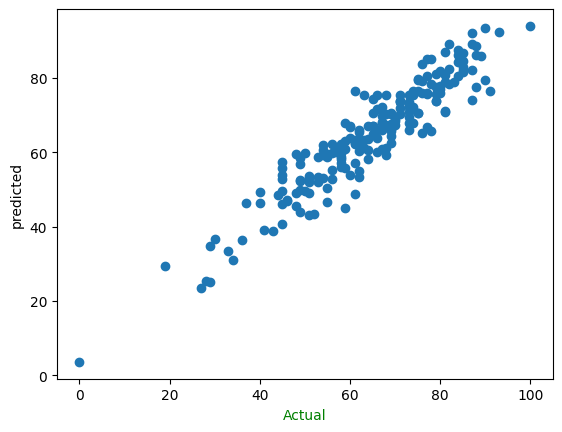

In [69]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual',color='g')
plt.ylabel('predicted')
plt.show


In [70]:
#difference b/w actual and predicated

pred_df=pd.DataFrame({'Actual value':Y_test,'Predicted value':y_pred,'difference':Y_test-y_pred})
pred_df

,Actual value,Predicted value,difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
